## Praktikum 2 : Decision Tree

~Import Library


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

~Menampilkan Data Dari CSV

In [ ]:
data = pd.read_csv('/content/iris.csv')
data.head(150)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


~Menampilkan tipe data masing-masing attribute

In [ ]:
print(data.dtypes)

5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object


~Menghitung jumlah attributes dan instances Data

In [ ]:
print(data.shape)

(149, 5)


~Menambahkan nama header pada data

In [ ]:
nama_kolom = ['sepal length (cm)', 'sepal width in (cm)', 'petal length in (cm)', 'petal width in (cm)', 'class']
newdata = pd.read_csv('iris.csv', header=None, names=nama_kolom)
newdata.head(10)

,sepal length (cm),sepal width in (cm),petal length in (cm),petal width in (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


~Mengatur Nilai Atribut Target (Class) Agar Menjadi Nilai Angka (Permisalan Encode)

In [ ]:
clear = newdata['class'].unique()
pemetaan = {nilai: urutan for urutan, nilai in enumerate(clear, start=1)}
newdata['class'] = newdata['class'].map(pemetaan)

newdata.head(10)

,sepal length (cm),sepal width in (cm),petal length in (cm),petal width in (cm),class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


~Melihat Statistik Data

In [ ]:
newdata.describe()

,sepal length (cm),sepal width in (cm),petal length in (cm),petal width in (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


~Penanganan Data Hilang (missing value)

In [ ]:
cek_value = newdata.isnull().sum()
cek_value

sepal length (cm)       0
sepal width in (cm)     0
petal length in (cm)    0
petal width in (cm)     0
class                   0
dtype: int64

In [ ]:
X = newdata.drop(columns='class')
Y = newdata['class']

# 1. Melakukan Split Data

In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# 2. Jalankan Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# 3. Melakukan Evaluasi Model dengan Accuracy Score dan Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Prediksi label kelas pada data latih
y_train_pred = clf.predict(X_train)

# Menghitung akurasi pada data latih
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", round(train_accuracy*100, 2), '%')

# Membuat confusion matrix pada data latih
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):",)
print(conf_matrix_train)


# Prediksi label kelas pada data test
y_pred = clf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(accuracy*100, 2),'%')

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 100.0 %
Confusion Matrix (Training Data):
[[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]
Test Accuracy: 100.0 %
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


~ Visualisasi Decision Tree

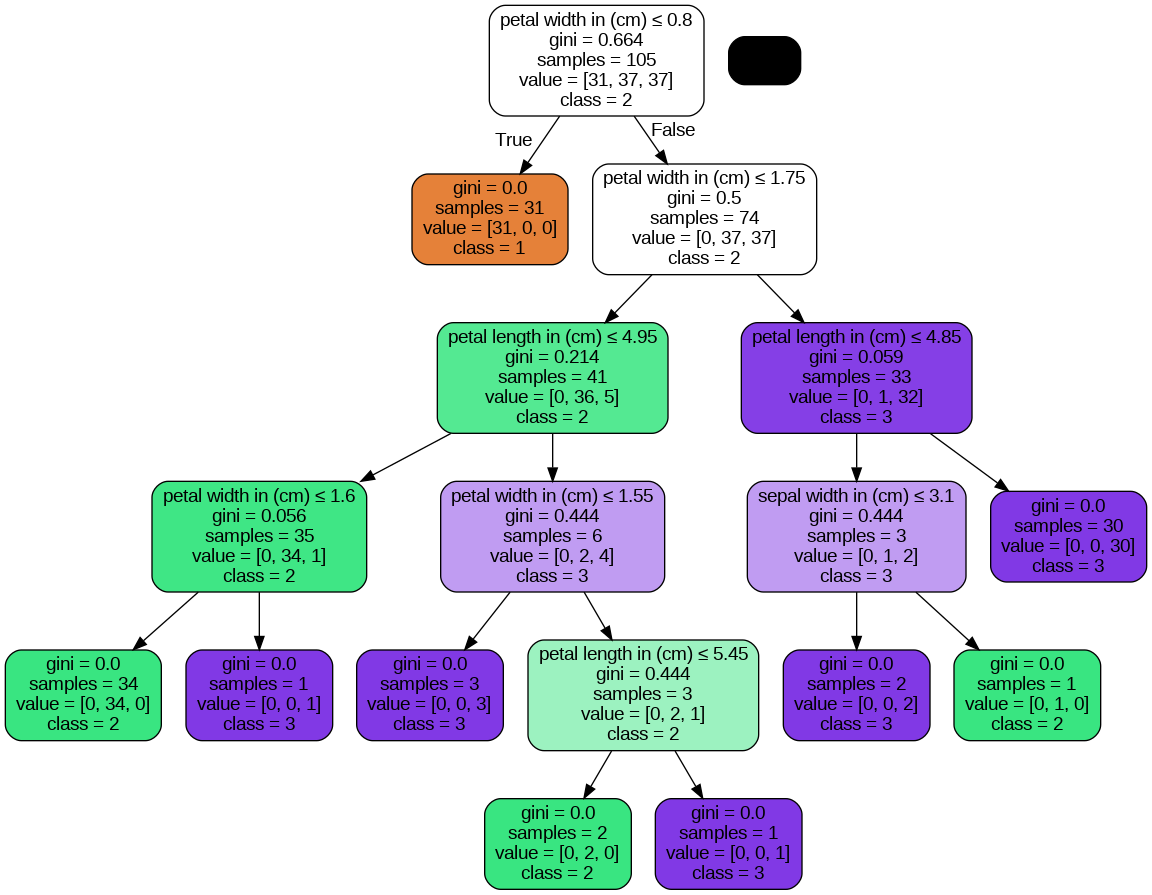

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_names = ['sepal length (cm)', 'sepal width in (cm)', 'petal length in (cm)', 'petal width in (cm)']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('D:\iris.png')
Image(graph.create_png())

~Decision Tree dengan Entropy

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Prediksi label kelas pada data latih
y_train_pred = clf.predict(X_train)

# Menghitung akurasi pada data latih
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", round(train_accuracy*100, 2), '%')

# Membuat confusion matrix pada data latih
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):",)
print(conf_matrix_train)


# Prediksi label kelas pada data test
y_pred = clf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(accuracy*100, 2),'%')

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 94.29 %
Confusion Matrix (Training Data):
[[31  0  0]
 [ 0 36  1]
 [ 0  5 32]]
Test Accuracy: 100.0 %
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


~ Visualisasi Data

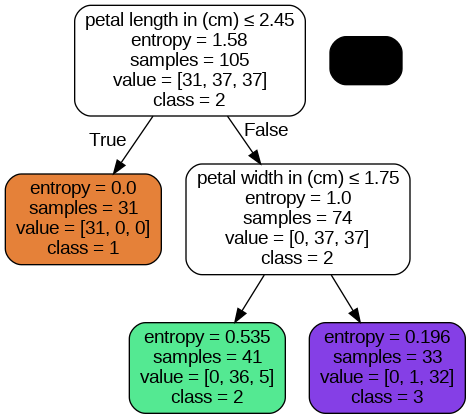

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('D:\iris.png')
Image(graph.create_png())

# 4.Menggunakan Cross Validation K-Fold

Percobaan 1

In [ ]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier()

# Lakukan cross-validation
scores = cross_val_score(clf, X, Y, cv=6)

# Cetak hasil cross-validation
print("Cross-Validation Scores:", scores)

# Cetak rata-rata dan deviasi standar dari skor-skor tersebut
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.96 1.   0.92 0.92 0.96 1.  ]
Mean Accuracy: 0.96
Standard Deviation: 0.032659863237109024


Percobaan 2

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=30)

# Lakukan cross-validation
scores = cross_val_score(clf, X, Y, cv=6)

# Cetak hasil cross-validation
print("Cross-Validation Scores:", scores)

# Cetak rata-rata dan deviasi standar dari skor-skor tersebut
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.96 1.   0.92 0.92 0.92 1.  ]
Mean Accuracy: 0.9533333333333333
Standard Deviation: 0.03590109871423001


# 5.Pre processing Data

~Seleksi Feature menjadi Tiga Feature Terbaik

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Contoh dengan SelectKBest dan f-score
selector = SelectKBest(score_func=f_classif, k=3)  # Pilih 3 fitur terbaik
X_new = selector.fit_transform(X, Y)

#Membuat data frame untuk feature yang sudah dipilih
new_x = pd.DataFrame(X_new)
new_x.head()

,0,1,2
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [ ]:
# Membuat data frame untuk feature yang sudah dipilih
nama_feature = ['sepal length (cm)', 'petal length in (cm)', 'petal width in (cm)']
data_X_new = pd.DataFrame(X_new, columns = nama_feature)
data_X_new.head()

,sepal length (cm),petal length in (cm),petal width in (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


~Standarisasi Feature

In [ ]:
#Standarisasi feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized = scaler.fit_transform(data_X_new)

stardardized_data = pd.DataFrame(standardized, columns = nama_feature)
stardardized_data.head()

,sepal length (cm),petal length in (cm),petal width in (cm)
0,-0.900681,-1.341272,-1.312977
1,-1.143017,-1.341272,-1.312977
2,-1.385353,-1.398138,-1.312977
3,-1.506521,-1.284407,-1.312977
4,-1.021849,-1.341272,-1.312977


~Visualisasi

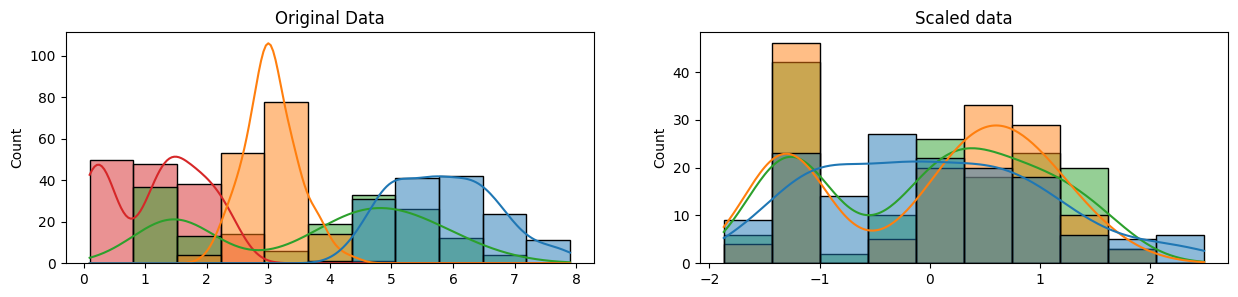

In [ ]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(X, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(stardardized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

~Reduksi Dimensi Data dengan PCA

In [ ]:
from sklearn.decomposition import PCA

n_components = 2  # Ganti dengan jumlah komponen yang diinginkan
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(stardardized_data)

In [ ]:
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1
0,-2.059540,-0.297681
1,-2.195165,-0.100742
2,-2.364426,0.081724
3,-2.364968,0.209141
4,-2.127353,-0.199211


Lihat banyaknya data label class

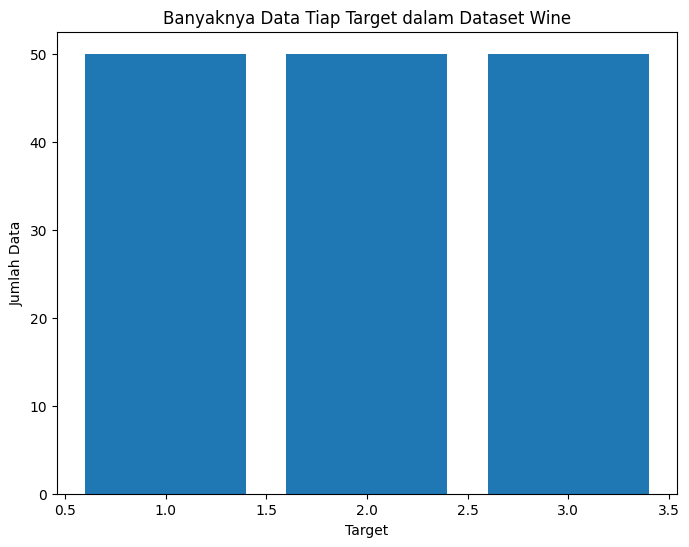

{1: 50, 2: 50, 3: 50}


In [ ]:
# Membuat array dengan jumlah unik target dan jumlah data untuk masing-masing target
unique_targets, target_counts = np.unique(Y, return_counts=True)

# Membuat plot batang untuk menampilkan banyaknya data untuk tiap target
plt.figure(figsize=(8, 6))
plt.bar(unique_targets, target_counts)
plt.xlabel('Target')
plt.ylabel('Jumlah Data')
plt.title('Banyaknya Data Tiap Target dalam Dataset Wine')
plt.show()

unique_targets, target_counts = np.unique(Y, return_counts=True)
print(dict(zip(unique_targets, target_counts)))

Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

resamp = RandomOverSampler()
balX, balY = resamp.fit_resample(X_pca, Y)

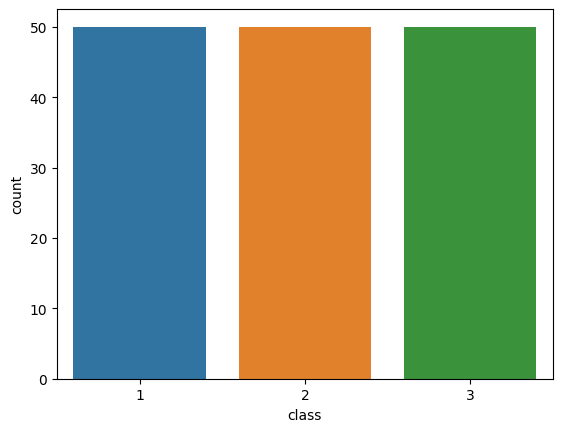

{1: 50, 2: 50, 3: 50}


In [ ]:
sns.countplot(x=balY)
plt.show()

unique_targets, target_counts = np.unique(balY, return_counts=True)
print(dict(zip(unique_targets, target_counts)))

# 6. Decision Tree dengan Data yang sudah dipre-process

###Percobaan 1

Split Data train dan Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balX, balY, test_size=0.3, random_state=42) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Prediksi label kelas pada data latih
y_train_pred = clf.predict(X_train)

# Menghitung akurasi pada data latih
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", round(train_accuracy*100, 2), '%')

# Membuat confusion matrix pada data latih
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):",)
print(conf_matrix_train)


# Prediksi label kelas pada data test
y_pred = clf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(accuracy*100, 2),'%')

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 100.0 %
Confusion Matrix (Training Data):
[[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]
Test Accuracy: 95.56 %
Confusion Matrix:
[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]


###Percobaan 2

Split Data train dan Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balX, balY, test_size=0.4, random_state=42) # 60% training and 40% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Prediksi label kelas pada data latih
y_train_pred = clf.predict(X_train)

# Menghitung akurasi pada data latih
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", round(train_accuracy*100, 2), '%')

# Membuat confusion matrix pada data latih
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):",)
print(conf_matrix_train)


# Prediksi label kelas pada data test
y_pred = clf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(accuracy*100, 2),'%')

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 100.0 %
Confusion Matrix (Training Data):
[[27  0  0]
 [ 0 31  0]
 [ 0  0 32]]
Test Accuracy: 96.67 %
Confusion Matrix:
[[23  0  0]
 [ 0 18  1]
 [ 0  1 17]]


###Percobaan 3

Split Data train dan Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balX, balY, test_size=0.4, random_state=42) # 60% training and 40% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=30)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Prediksi label kelas pada data latih
y_train_pred = clf.predict(X_train)

# Menghitung akurasi pada data latih
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", round(train_accuracy*100, 2), '%')

# Membuat confusion matrix pada data latih
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):",)
print(conf_matrix_train)


# Prediksi label kelas pada data test
y_pred = clf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(accuracy*100, 2),'%')

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 93.33 %
Confusion Matrix (Training Data):
[[27  0  0]
 [ 0 26  5]
 [ 0  1 31]]
Test Accuracy: 93.33 %
Confusion Matrix:
[[23  0  0]
 [ 0 15  4]
 [ 0  0 18]]


# 7. Menggunakan Cross Validation

###Hasil Terbaik dengan Cross Validation

In [ ]:
clf = DecisionTreeClassifier(random_state=30)

# Lakukan cross-validation
scores = cross_val_score(clf, balX, balY, cv=6)

# Cetak hasil cross-validation
print("Cross-Validation Scores:", scores)

# Cetak rata-rata dan deviasi standar dari skor-skor tersebut
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.96 1.   0.92 0.96 0.92 1.  ]
Mean Accuracy: 0.96
Standard Deviation: 0.032659863237109024


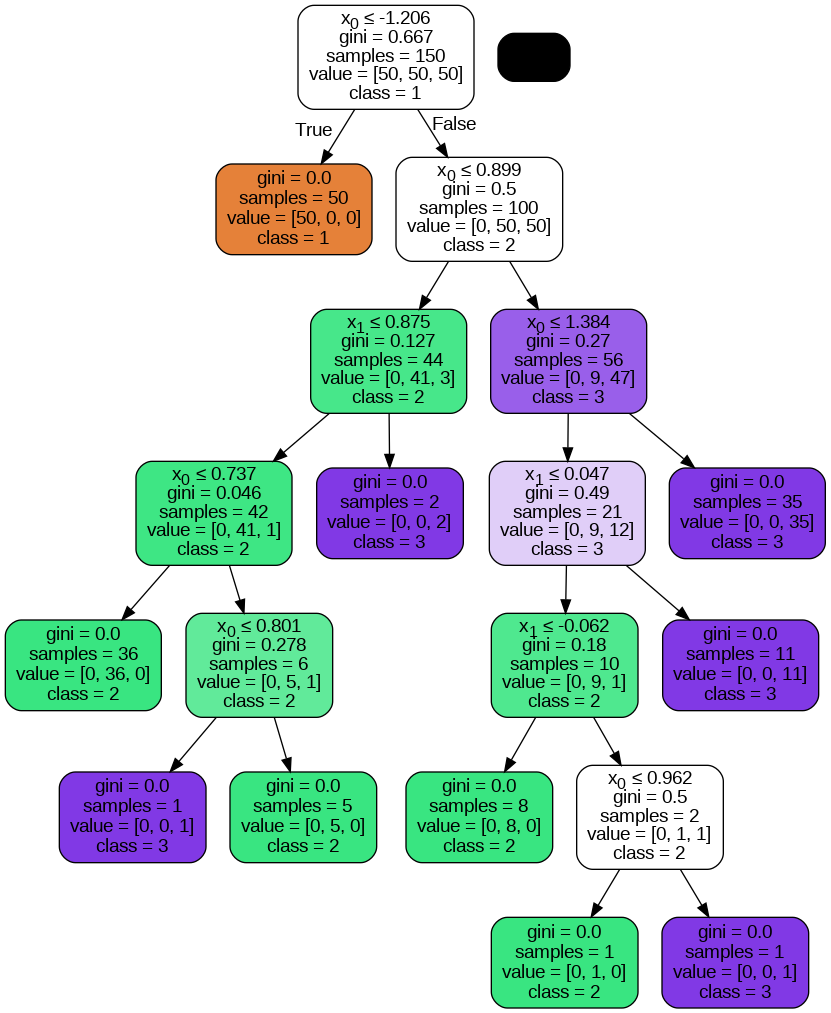

In [ ]:
# Melatih model pada seluruh dataset
clf.fit(balX, balY)

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True ,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('D:\wine3.png')
Image(graph.create_png())

###Percobaan 2 Cross Validation

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=30)

# Lakukan cross-validation
scores = cross_val_score(clf, balX, balY, cv=6)

# Cetak hasil cross-validation
print("Cross-Validation Scores:", scores)

# Cetak rata-rata dan deviasi standar dari skor-skor tersebut
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.92 1.   0.92 0.92 0.96 1.  ]
Mean Accuracy: 0.9533333333333333
Standard Deviation: 0.03590109871423001


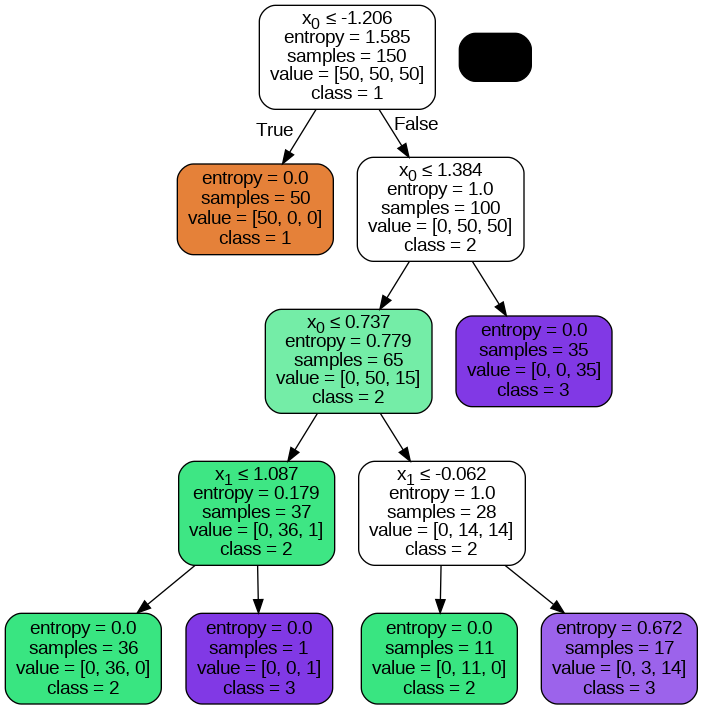

In [ ]:
# Melatih model pada seluruh dataset
clf.fit(balX, balY)

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True ,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('D:\wine4.png')
Image(graph.create_png())

###Percobaan 3 Cross Validation

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=30)

# Lakukan cross-validation
scores = cross_val_score(clf, balX, balY, cv=3)

# Cetak hasil cross-validation
print("Cross-Validation Scores:", scores)

# Cetak rata-rata dan deviasi standar dari skor-skor tersebut
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.84 0.9  0.88]
Mean Accuracy: 0.8733333333333334
Standard Deviation: 0.024944382578492966


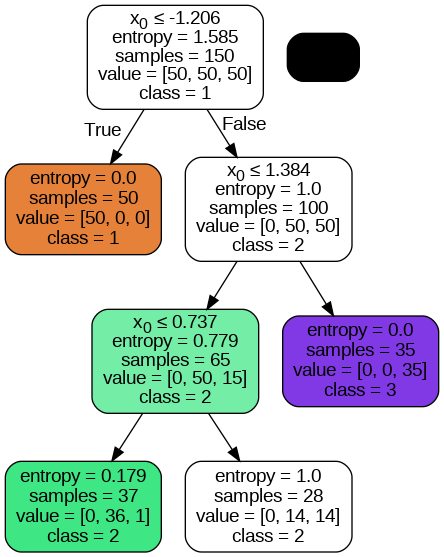

In [ ]:
# Melatih model pada seluruh dataset
clf.fit(balX, balY)

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True ,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('D:\wine3.png')
Image(graph.create_png())